## About Dataset

### Netflix titles dataset

In [31]:
#importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Reading the data using pandas library
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
#getting the information about the datas and their datattypes which helps us to know which data needs changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.shape #total size of the data i.e 8807 rows and 12 columns

(8807, 12)

In [11]:
df.describe() # this provides the statistical summary of the data i.e min,max,mean,std,etc also called as 5 point summary.

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


## Data Cleaning

### Handling the missing data

In [12]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [16]:
df.dropna(inplace=True)

In [ ]:
df.shape  # After removing the missing data from the dataset,the size of the dataset reduced to (8807,12)--->(5332,12)

(5332, 12)

### Handling the duplicate data

In [ ]:
df.duplicated().sum()  #there are no duplicate data available in dataset

0

### Handling the outliers

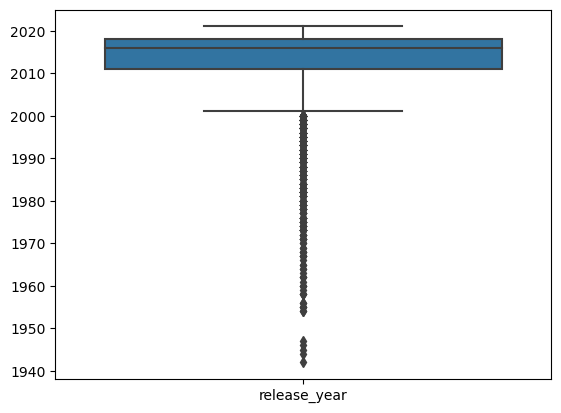

In [ ]:
sns.boxplot(data = df,)
plt.show()

In [26]:
new_df = df[df["release_year"]>2000]
new_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...
28,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,"September 19, 2021",2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...


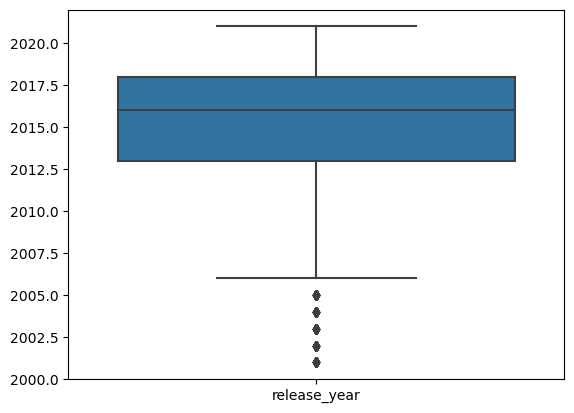

In [27]:
sns.boxplot(data = new_df,)
plt.show()

### Data Transformation

In [ ]:
new_df["date_added"]=pd.to_datetime(df["date_added"],format="mixed")
new_df.info()          # successfully changed the datatype of date_added from object---> datetime

<class 'pandas.core.frame.DataFrame'>
Index: 4859 entries, 8 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       4859 non-null   object        
 1   type          4859 non-null   object        
 2   title         4859 non-null   object        
 3   director      4859 non-null   object        
 4   cast          4859 non-null   object        
 5   country       4859 non-null   object        
 6   date_added    4859 non-null   datetime64[ns]
 7   release_year  4859 non-null   int64         
 8   rating        4859 non-null   object        
 9   duration      4859 non-null   object        
 10  listed_in     4859 non-null   object        
 11  description   4859 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 493.5+ KB


In [34]:
new_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,2021-09-20,2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...
28,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,2021-09-19,2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...


In [35]:
new_df.describe()

,date_added,release_year
count,4859,4859.00000
mean,2019-04-20 02:09:12.706318336,2015.20354
min,2008-01-01 00:00:00,2001.00000
25%,2018-04-01 00:00:00,2013.00000
50%,2019-05-19 00:00:00,2016.00000
75%,2020-06-19 12:00:00,2018.00000
max,2021-09-24 00:00:00,2021.00000
std,NaN,4.49925


In [ ]:
## Hence we have performed all the data Cleaning and Preprocessing task on the data 